In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/converted_file.csv')

In [5]:
df.head()


,Unnamed: 0,Pregnancies,Glucose,Blood pressure,Skin Insulin,BMI,Diabetes,Age,Outcome
0,0,6,148,77,35,16.8,2.00,56,1
1,1,1,135,89,28,19.5,0.10,23,0
2,2,8,87,76,34,21.2,0.22,77,1
3,3,0,98,56,26,23.7,0.28,34,0
4,4,1,101,60,34,25.5,0.78,45,0


In [6]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.40


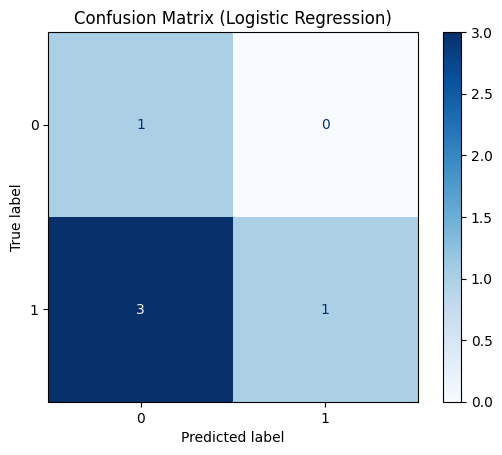

In [9]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
model = LogisticRegression(C=1.0, max_iter=1000)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)


In [13]:
y.value_counts()


,count
Outcome,
1,11
0,10


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(C=1.0, max_iter=100)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=10)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


Text(50.72222222222221, 0.5, 'Actual')

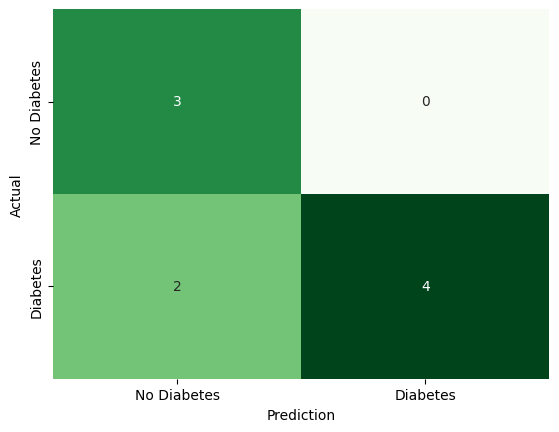

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar= False, cmap='Greens')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")